In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [2]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [3]:
file_name

'D:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/CATASTRO/CATASTRO_2023-02-13.shp'

In [4]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

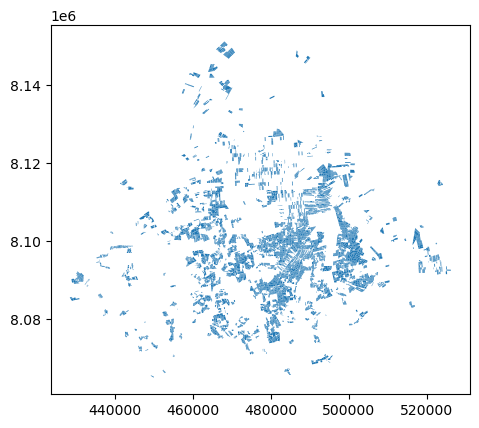

In [5]:
data.plot()
plt.show()

In [6]:
data.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
0,00005600000L1.3,560.0,LA_TUJA_IAG_SA,15284.0,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,2018-05-30,FY,IAG,4,canha,79,0.771315,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L1.5,560.0,LA_TUJA_IAG_SA,15284.0,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,2011-05-20,FY,None,11,canha,79,3.831973,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,00005600000L2.2,560.0,LA_TUJA_IAG_SA,15284.0,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,2018-05-20,FY,IAG,4,canha,79,2.245713,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."


In [7]:
data.crs.name

'WGS 84 / UTM zone 20S'

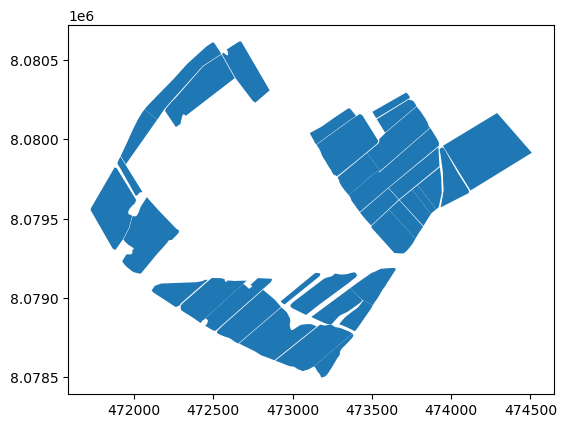

In [9]:
propiedad = data[data['unidad_01']==1012]
propiedad.plot()
plt.show()

In [10]:
def quitar_caracteres(text):
    text = text.replace('_', ' ')
    text = text.replace('"', '')
    text = text.replace('.', '')
    return text

In [11]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'unidad_01':'int',
    'unidad_03':'int'
})

In [12]:
propiedad.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
4365,000010120000L12,1012,MUYURINA--ESCUELA_SALESIANA_MUYURIN,3392,ROCABADO_GUZMAN_ALVARO_JULIO,L12,RBB_77-26,2018-04-23,FY,PROPIO,4,canha,5,5.149592,"POLYGON Z ((472639.918 8080386.061 0.000, 4725..."
4366,000010120000L8,1012,MUYURINA--ESCUELA_SALESIANA_MUYURIN,3392,ROCABADO_GUZMAN_ALVARO_JULIO,L8,RBB_77-26,2013-05-12,F,None,9,canha,5,2.034677,"POLYGON Z ((473531.154 8080127.106 0.000, 4737..."
4367,000010120000L2.3,1012,MUYURINA--ESCUELA_SALESIANA_MUYURIN,3392,ROCABADO_GUZMAN_ALVARO_JULIO,L2.3,RENOVACION,None,F,None,122,renovacion,5,2.178465,"POLYGON Z ((473904.428 8079558.078 0.000, 4737..."


In [13]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']
file_name

'1012_MUYURINA--ESCUELA_SALESIANA_MUYURIN'

In [14]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financia,soca,cultivo,zona,area,geometry
4365,000010120000L12,1012,MUYURINA--ESCUELA_SALESIANA_MUYURIN,3392,ROCABADO_GUZMAN_ALVARO_JULIO,L12,RBB_77-26,2018-04-23,FY,PROPIO,4,canha,5,5.149592,"POLYGON Z ((472639.918 8080386.061 0.000, 4725..."
4366,000010120000L8,1012,MUYURINA--ESCUELA_SALESIANA_MUYURIN,3392,ROCABADO_GUZMAN_ALVARO_JULIO,L8,RBB_77-26,2013-05-12,F,None,9,canha,5,2.034677,"POLYGON Z ((473531.154 8080127.106 0.000, 4737..."
4367,000010120000L2.3,1012,MUYURINA--ESCUELA_SALESIANA_MUYURIN,3392,ROCABADO_GUZMAN_ALVARO_JULIO,L2.3,RENOVACION,None,F,None,122,renovacion,5,2.178465,"POLYGON Z ((473904.428 8079558.078 0.000, 4737..."
4368,000010120000L3.1,1012,MUYURINA--ESCUELA_SALESIANA_MUYURIN,3392,ROCABADO_GUZMAN_ALVARO_JULIO,L3.1,RENOVACION,None,F,None,122,renovacion,5,4.072712,"POLYGON Z ((473775.026 8079374.149 0.000, 4737..."
4369,000010120000L1,1012,MUYURINA--ESCUELA_SALESIANA_MUYURIN,3392,ROCABADO_GUZMAN_ALVARO_JULIO,L1,RBB_77-26,2018-04-17,F,PROPIO,4,canha,5,3.342083,"POLYGON Z ((473933.473 8079570.681 0.000, 4739..."


In [15]:
num_columnas = len(propiedad.columns)
num_columnas

15

In [16]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [17]:
propiedad.head(3)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financia,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
4365,000010120000L12,1012,MUYURINA--ESCUELA_SALESIANA_MUYURIN,3392,ROCABADO_GUZMAN_ALVARO_JULIO,L12,RBB_77-26,2018-04-23,FY,PROPIO,...,5.149592,RBB_77-26,2018-04-23,4,,0,3392,1012,000010120000L12,0
4366,000010120000L8,1012,MUYURINA--ESCUELA_SALESIANA_MUYURIN,3392,ROCABADO_GUZMAN_ALVARO_JULIO,L8,RBB_77-26,2013-05-12,F,None,...,2.034677,RBB_77-26,2013-05-12,9,,0,3392,1012,000010120000L8,0
4367,000010120000L2.3,1012,MUYURINA--ESCUELA_SALESIANA_MUYURIN,3392,ROCABADO_GUZMAN_ALVARO_JULIO,L2.3,RENOVACION,None,F,None,...,2.178465,RENOVACION,None,122,,0,3392,1012,000010120000L2.3,0


In [18]:
propiedad.columns

Index(['cod', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05',
       'var', 'fs', 'tex', 'financia', 'soca', 'cultivo', 'zona', 'area',
       'geometry', 'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD',
       'FECHA_SIEM', 'CORTE', 'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP',
       'ID', 'CUADRANTE'],
      dtype='object')

In [19]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [20]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
4365,"POLYGON Z ((472639.918 8080386.061 0.000, 4725...",L12,FY,5.149592,RBB_77-26,2018-04-23,4,,0,3392,1012,000010120000L12,0
4366,"POLYGON Z ((473531.154 8080127.106 0.000, 4737...",L8,F,2.034677,RBB_77-26,2013-05-12,9,,0,3392,1012,000010120000L8,0
4367,"POLYGON Z ((473904.428 8079558.078 0.000, 4737...",L2.3,F,2.178465,RENOVACION,None,122,,0,3392,1012,000010120000L2.3,0
4368,"POLYGON Z ((473775.026 8079374.149 0.000, 4737...",L3.1,F,4.072712,RENOVACION,None,122,,0,3392,1012,000010120000L3.1,0
4369,"POLYGON Z ((473933.473 8079570.681 0.000, 4739...",L1,F,3.342083,RBB_77-26,2018-04-17,4,,0,3392,1012,000010120000L1,0


In [21]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        else:
            return 'SOCA'
    except Exception as ex:
        return 'RENOVACION'

In [22]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [23]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [24]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
4365,"POLYGON Z ((472639.918 8080386.061 0.000, 4725...",L12,FY,5.149592,RBB_77-26,20180423,4,SOCA,0,3392,1012,000010120000L12,0
4366,"POLYGON Z ((473531.154 8080127.106 0.000, 4737...",L8,F,2.034677,RBB_77-26,20130512,9,SOCA,0,3392,1012,000010120000L8,0
4367,"POLYGON Z ((473904.428 8079558.078 0.000, 4737...",L2.3,F,2.178465,RENOVACION,0,122,RENOVACION,0,3392,1012,000010120000L2.3,0
4368,"POLYGON Z ((473775.026 8079374.149 0.000, 4737...",L3.1,F,4.072712,RENOVACION,0,122,RENOVACION,0,3392,1012,000010120000L3.1,0
4369,"POLYGON Z ((473933.473 8079570.681 0.000, 4739...",L1,F,3.342083,RBB_77-26,20180417,4,SOCA,0,3392,1012,000010120000L1,0


In [25]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [26]:
tchs = pd.read_excel(fp_tch)

In [27]:
tchs.head(3)

,COD_AVANCE,CODIGO CAÑERO,INS,NOMBRE CAÑERO,DESSIG,CREA,COMPROMISO GRUPAL,COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,...,TN ENTREGADAS INDIVIDUAL,% ENTREGA GRUPAL,HA COSECHA GRUPAL,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2022,RENDIMIENTO 2021,ESTIMATIVA RENDIMIENTO 2022,OBSERVACIONES,Unnamed: 20
0,131_1,2224,NaN,CRUZ VARGAS WILLY WALDO,NaN,NaN,7067.07,0.00,NaN,NaN,...,42.86,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,81_36,41555,81.0,FRANCO GUZMAN CARLA DANIELA,NaN,NaN,7053.98,7053.98,0.0,0.0,...,7138.06,1.011920,0.0,0.0,NaN,NaN,0.000000,59.896088,SIN CATASTRO,NaN
2,50_29,15501,50.0,WENDE RIOJA MAURICIO,NaN,NaN,4525.38,4525.38,0.0,0.0,...,3537.96,0.781804,0.0,0.0,NaN,NaN,39.153575,0.000000,SIN CATASTRO,NaN


In [28]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO'] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [29]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'RENDIMIENT':'float',
    'COD_CA':'int',
    'COD_PROP':'int'
})

In [30]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
4365,"POLYGON Z ((472639.918 8080386.061 0.000, 4725...",L12,FY,5.149592,RBB_77-26,20180423,4,SOCA,63.646047,3392,1012,000010120000L12,0
4366,"POLYGON Z ((473531.154 8080127.106 0.000, 4737...",L8,F,2.034677,RBB_77-26,20130512,9,SOCA,63.646047,3392,1012,000010120000L8,0
4367,"POLYGON Z ((473904.428 8079558.078 0.000, 4737...",L2.3,F,2.178465,RENOVACION,0,122,RENOVACION,63.646047,3392,1012,000010120000L2.3,0


In [31]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [32]:
bloques = pd.read_excel(fp_bloques)

In [33]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,fk_pixel,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,44038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN


In [34]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [35]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
4365,"POLYGON Z ((472639.918 8080386.061 0.000, 4725...",L12,FY,5.149592,RBB_77-26,20180423,4,SOCA,63.646047,3392,1012,000010120000L12,359
4366,"POLYGON Z ((473531.154 8080127.106 0.000, 4737...",L8,F,2.034677,RBB_77-26,20130512,9,SOCA,63.646047,3392,1012,000010120000L8,359
4367,"POLYGON Z ((473904.428 8079558.078 0.000, 4737...",L2.3,F,2.178465,RENOVACION,0,122,RENOVACION,63.646047,3392,1012,000010120000L2.3,359


In [36]:
propiedad['ID'] = propiedad.apply(lambda x : '0000' + str(x['COD_PROP']) + '0000' + x['NOM_LOTE'], axis=1)

In [37]:
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
4365,"POLYGON Z ((472639.918 8080386.061 0.000, 4725...",L12,FY,5.149592,RBB_77-26,20180423,4,SOCA,63.646047,3392,1012,000010120000L12,359
4366,"POLYGON Z ((473531.154 8080127.106 0.000, 4737...",L8,F,2.034677,RBB_77-26,20130512,9,SOCA,63.646047,3392,1012,000010120000L8,359
4367,"POLYGON Z ((473904.428 8079558.078 0.000, 4737...",L2.3,F,2.178465,RENOVACION,0,122,RENOVACION,63.646047,3392,1012,000010120000L2.3,359


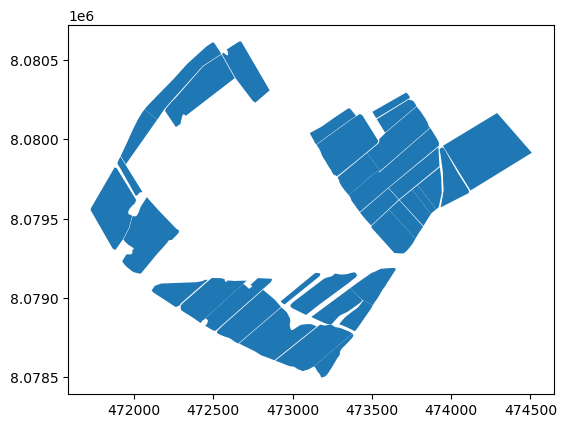

In [38]:
propiedad.plot()
plt.show()

In [39]:
#quitar_caracteres
propiedad['VARIEDAD'] = propiedad['VARIEDAD'].apply(quitar_caracteres)

In [40]:
propiedad

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
4365,"POLYGON Z ((472639.918 8080386.061 0.000, 4725...",L12,FY,5.149592,RBB 77-26,20180423,4,SOCA,63.646047,3392,1012,000010120000L12,359
4366,"POLYGON Z ((473531.154 8080127.106 0.000, 4737...",L8,F,2.034677,RBB 77-26,20130512,9,SOCA,63.646047,3392,1012,000010120000L8,359
4367,"POLYGON Z ((473904.428 8079558.078 0.000, 4737...",L2.3,F,2.178465,RENOVACION,0,122,RENOVACION,63.646047,3392,1012,000010120000L2.3,359
4368,"POLYGON Z ((473775.026 8079374.149 0.000, 4737...",L3.1,F,4.072712,RENOVACION,0,122,RENOVACION,63.646047,3392,1012,000010120000L3.1,359
4369,"POLYGON Z ((473933.473 8079570.681 0.000, 4739...",L1,F,3.342083,RBB 77-26,20180417,4,SOCA,63.646047,3392,1012,000010120000L1,359
4370,"POLYGON Z ((473425.369 8079538.010 0.000, 4736...",L5,F,2.430872,RBB 77-26,20180409,4,SOCA,63.646047,3392,1012,000010120000L5,359
4371,"POLYGON Z ((473605.728 8079694.271 0.000, 4739...",L4,F,3.587484,RENOVACION,0,122,RENOVACION,63.646047,3392,1012,000010120000L4,359
4372,"POLYGON Z ((473920.181 8079958.246 0.000, 4736...",L6,F,7.902600,RENOVACION,0,122,RENOVACION,63.646047,3392,1012,000010120000L6,359
4373,"POLYGON Z ((473551.821 8079801.357 0.000, 4734...",L7.2,F,6.488218,RENOVACION,0,122,RENOVACION,63.646047,3392,1012,000010120000L7.2,359
4374,"POLYGON Z ((473502.891 8080173.798 0.000, 4737...",L9,F,1.111242,RBB 77-26,20130512,9,SOCA,63.646047,3392,1012,000010120000L9,359


In [41]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
4365,"POLYGON Z ((472639.918 8080386.061 0.000, 4725...",L12,FY,5.149592,RBB 77-26,20180423,4,SOCA,63.646047,3392,1012,000010120000L12,359
4366,"POLYGON Z ((473531.154 8080127.106 0.000, 4737...",L8,F,2.034677,RBB 77-26,20130512,9,SOCA,63.646047,3392,1012,000010120000L8,359
4367,"POLYGON Z ((473904.428 8079558.078 0.000, 4737...",L2.3,F,2.178465,RENOVACION,0,122,RENOVACION,63.646047,3392,1012,000010120000L2.3,359
4368,"POLYGON Z ((473775.026 8079374.149 0.000, 4737...",L3.1,F,4.072712,RENOVACION,0,122,RENOVACION,63.646047,3392,1012,000010120000L3.1,359
4369,"POLYGON Z ((473933.473 8079570.681 0.000, 4739...",L1,F,3.342083,RBB 77-26,20180417,4,SOCA,63.646047,3392,1012,000010120000L1,359


In [42]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
propiedad = propiedad.to_crs(epsg=4326)

In [44]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
propiedad['SUPERFICIE'].sum()

151.60207347685298

In [46]:
file_name + '.geojson'

'1012_MUYURINA--ESCUELA_SALESIANA_MUYURIN.geojson'

In [47]:
#file_name='d'

In [48]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\PROPIEDADES_OFFICIALES")

In [49]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [50]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\PROPIEDADES_OFFICIALES\\1012_MUYURINA--ESCUELA_SALESIANA_MUYURIN.geojson'

In [51]:
propiedad.to_file(out_dir, driver='GeoJSON')